# **PRML MAJOR PROJECT**

### Prepared by  
# Gaurav Naval (B21EE020)  
# Abhaymani Singh (B21EE001)  
# Garvit Gangwal (B21EE019)

# **Loading** **Libraries**, **loading** **dataset** **and** **preprocessing**

In [ ]:
pip install -U mlxtend==0.17.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
#Loading the dataset

df=pd.read_csv('/content/diabetes_data.csv')
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
#Checking null values

df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [ ]:
#checking datatype of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [ ]:
# Encoding the 'gender' feature
le=LE()
df["gender"]=le.fit_transform(df["gender"])

# **Data Visualisation**

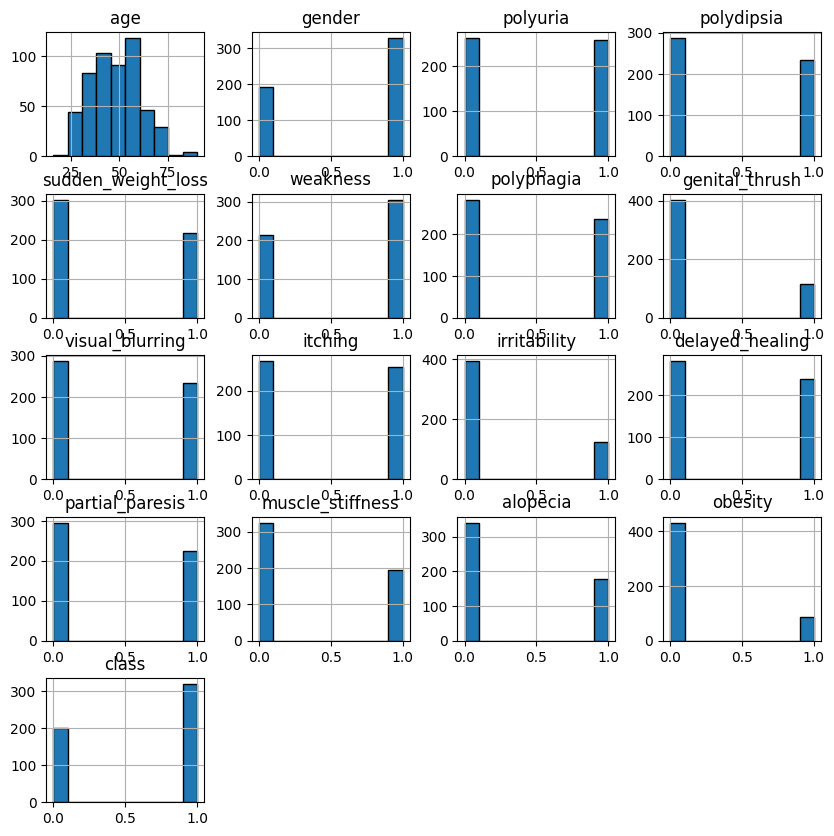

In [ ]:
# Plot histograms of all numerical variables
df.hist(figsize=(10,10),edgecolor='k')
plt.show()

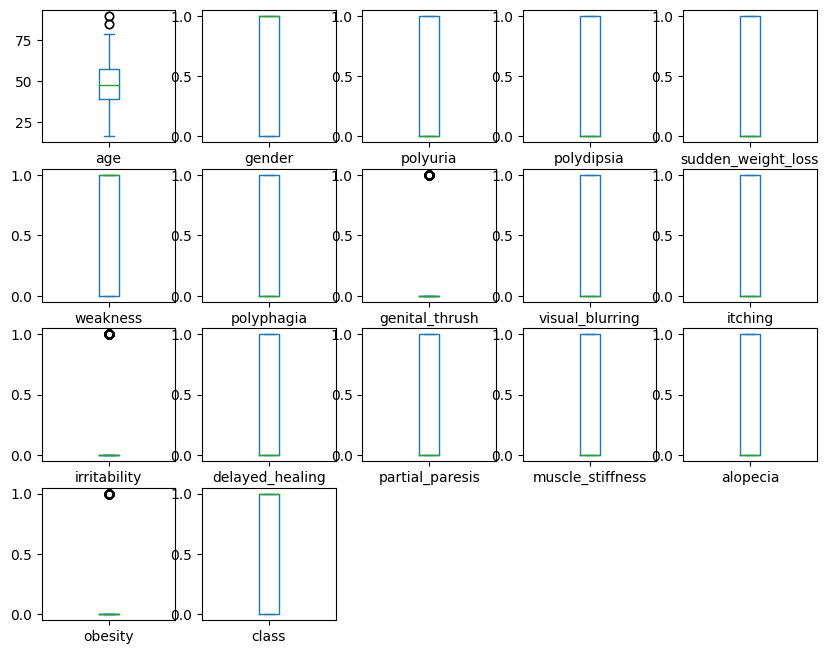

In [ ]:
# Plot box plots of all numerical variables
df.plot(kind="box", subplots=True, layout=(5,5), figsize=(10,10))
plt.show()


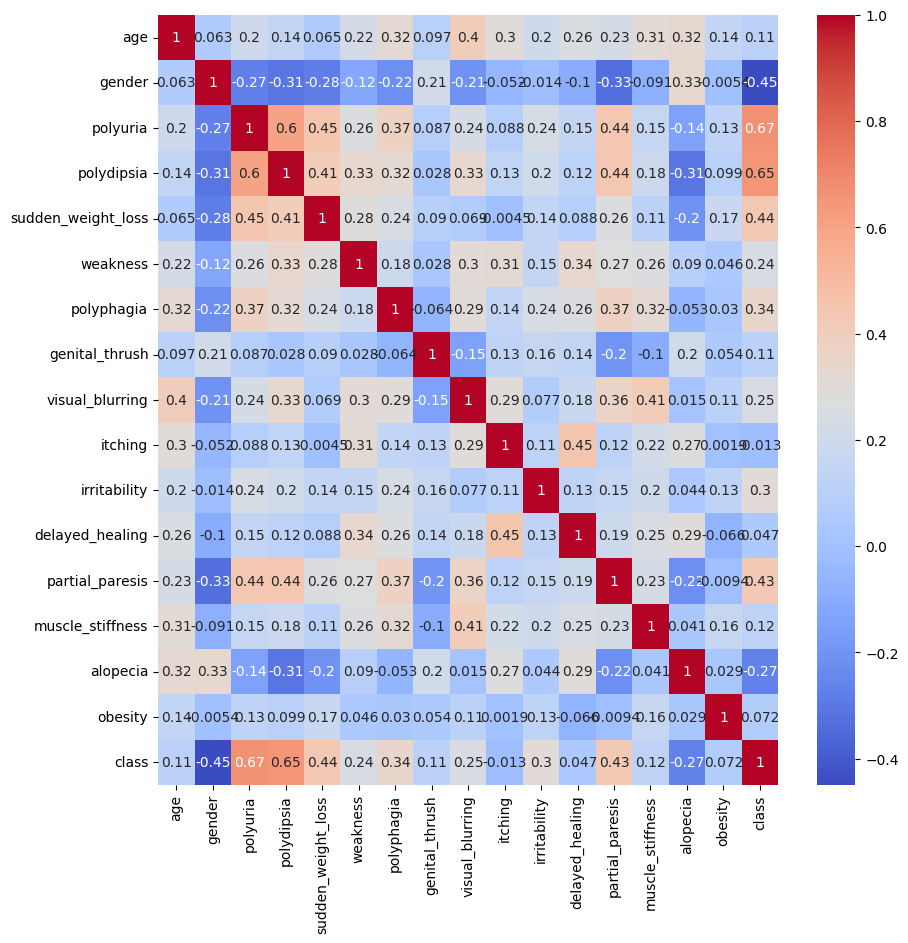

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

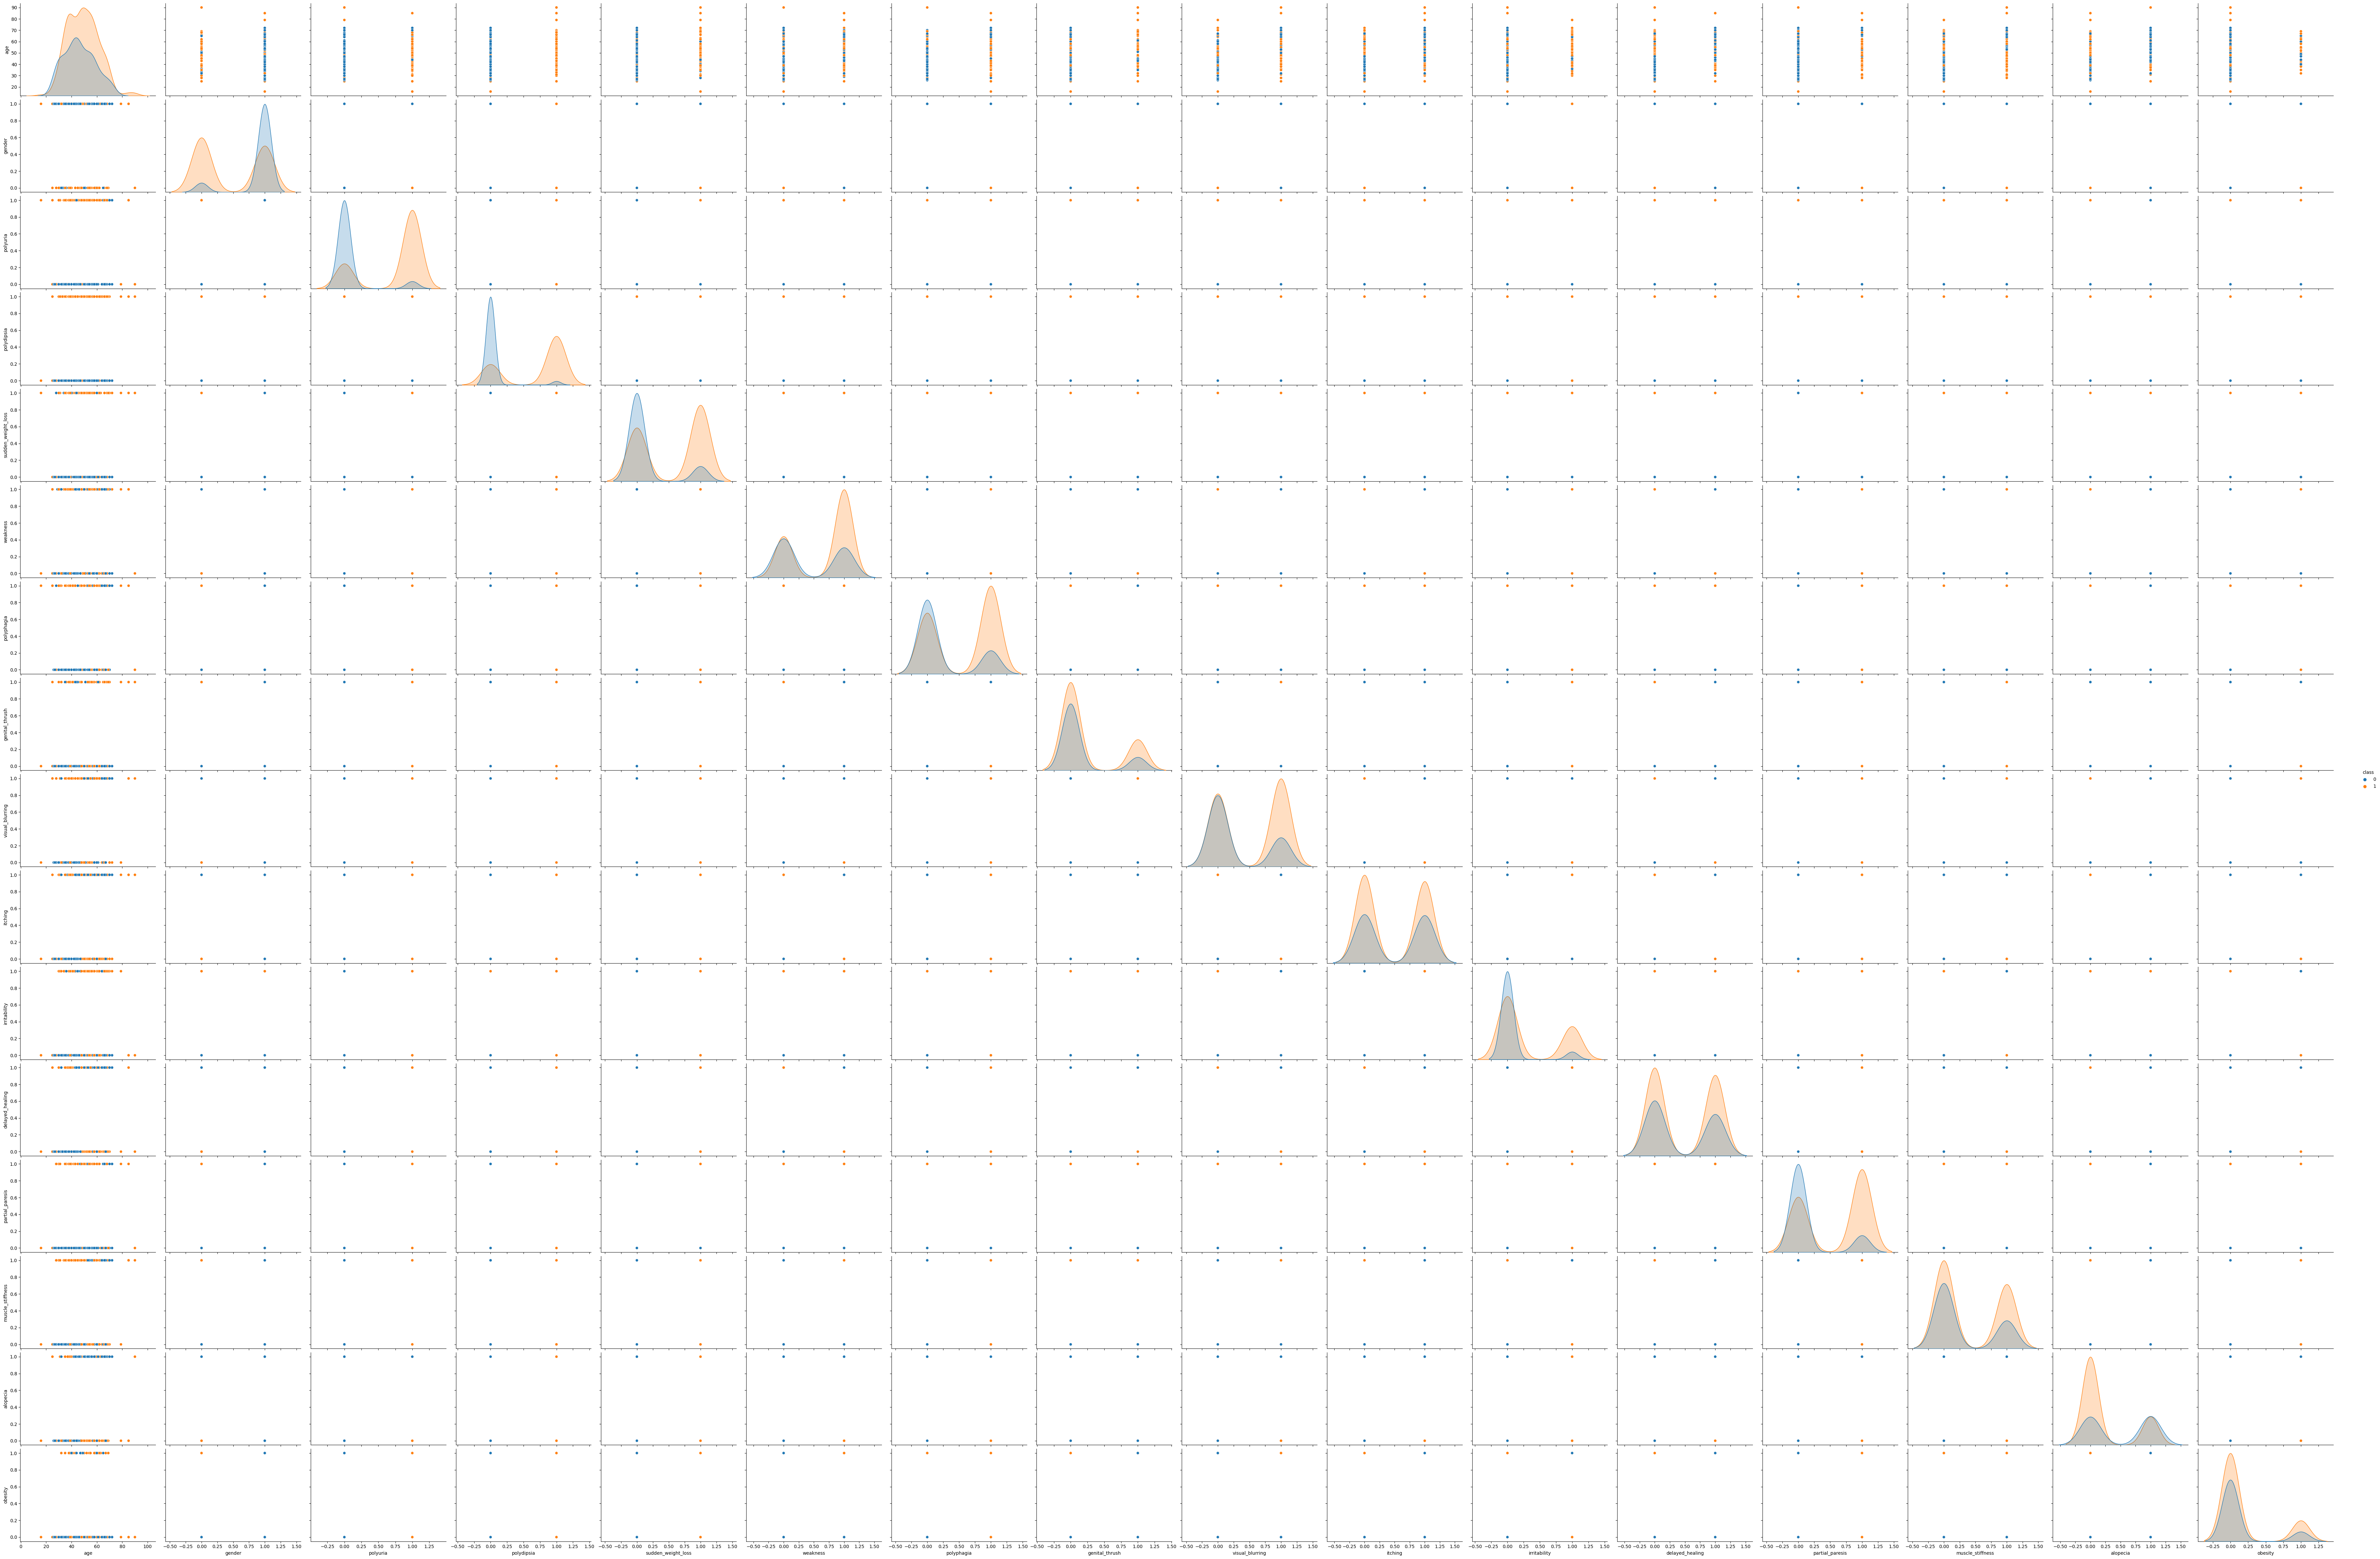

In [ ]:
# Plot scatter plot matrix of all numerical variables
sns.pairplot(df, hue="class",height=3, aspect=1.5)
plt.show()

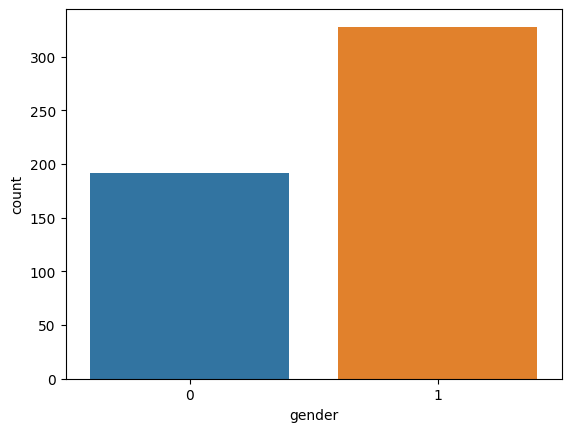

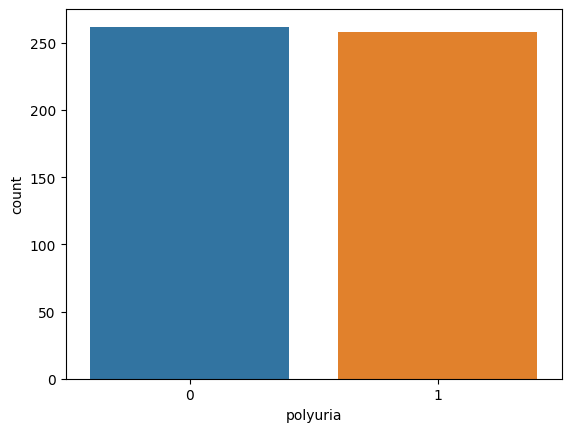

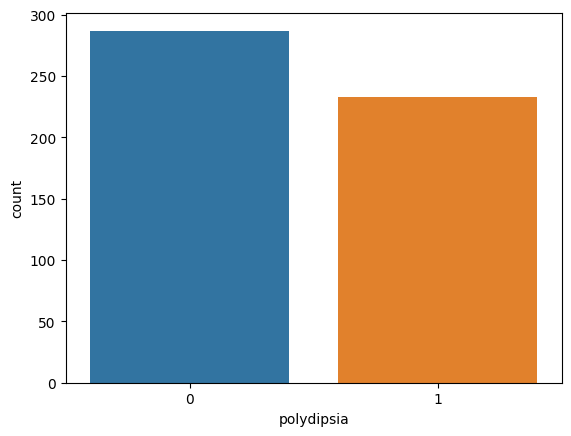

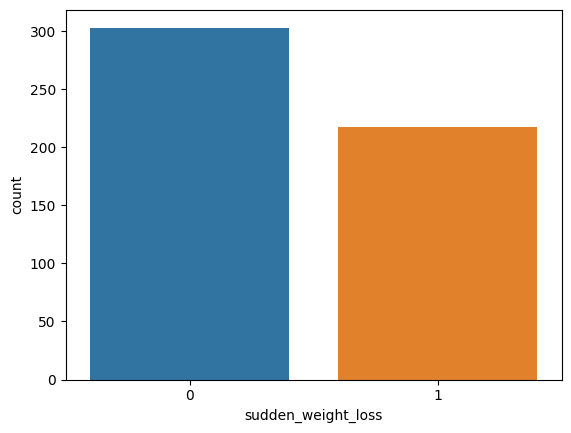

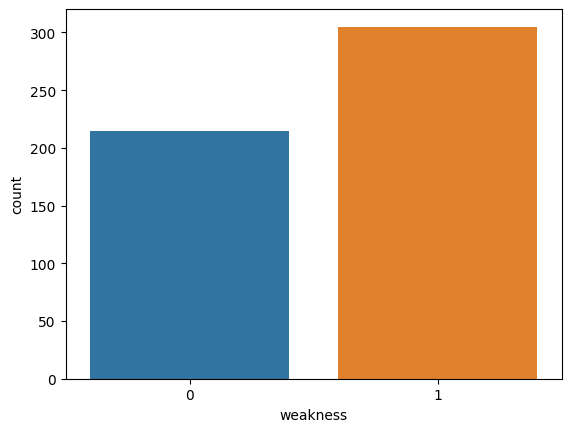

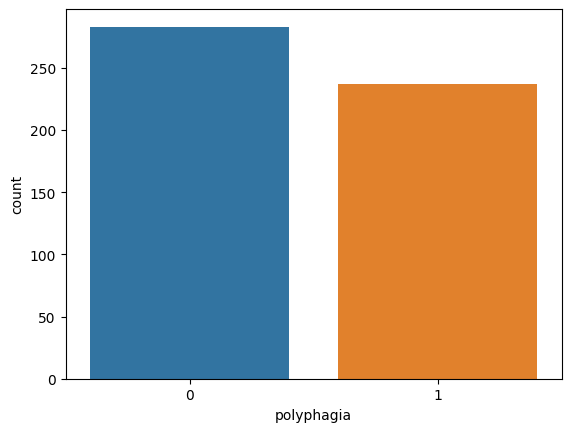

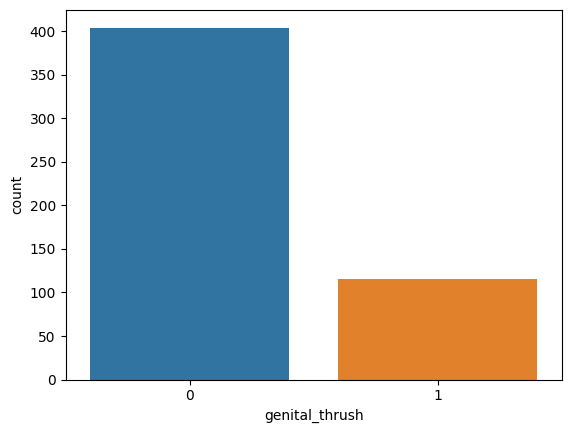

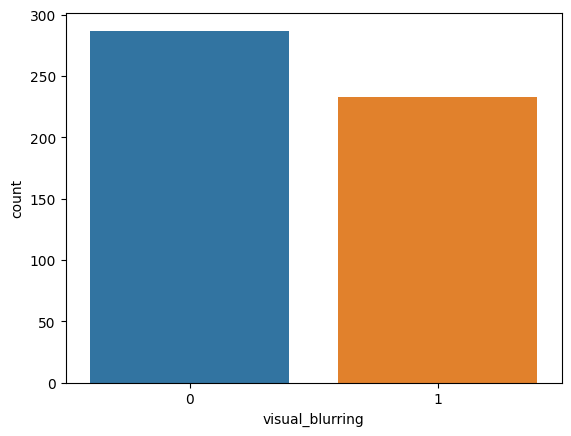

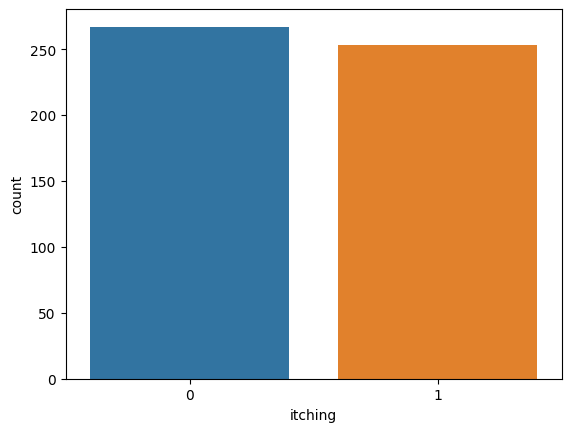

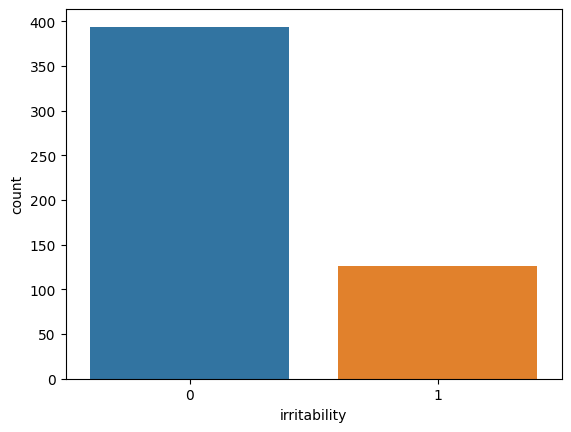

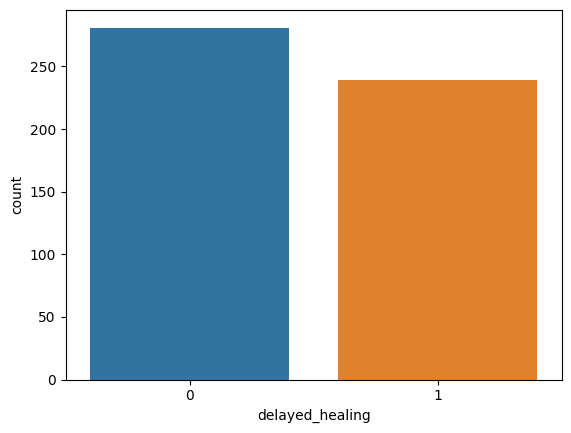

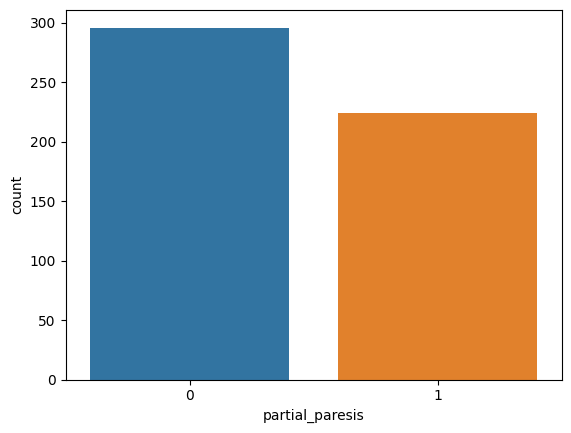

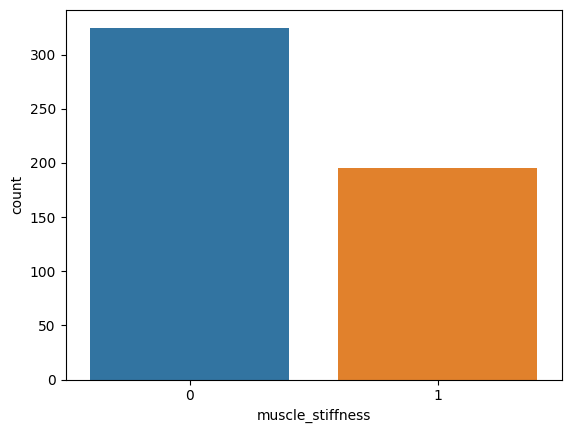

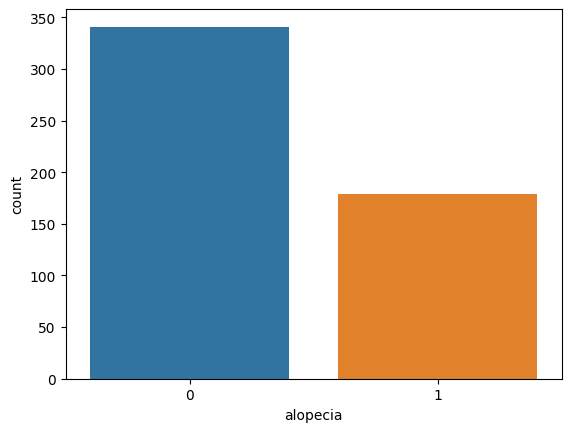

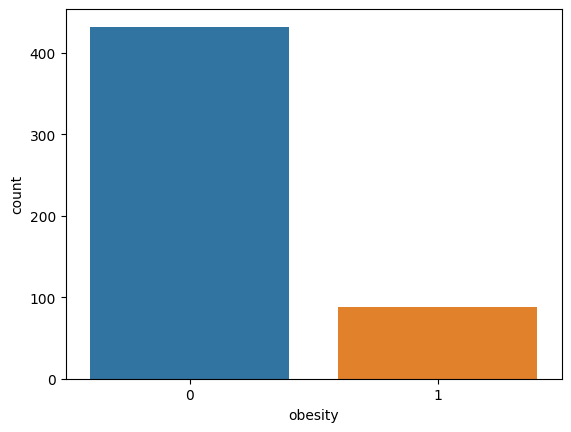

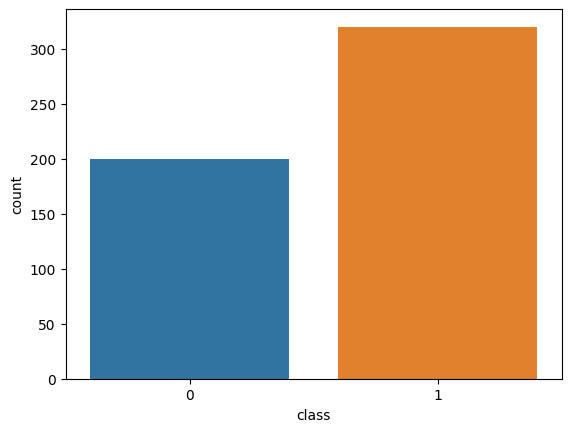

In [ ]:
# Plot bar charts of all categorical variables
for col in ["gender", "polyuria", "polydipsia", "sudden_weight_loss", "weakness", "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity", "class"]:
    sns.countplot(x=col, data=df)
    plt.show()

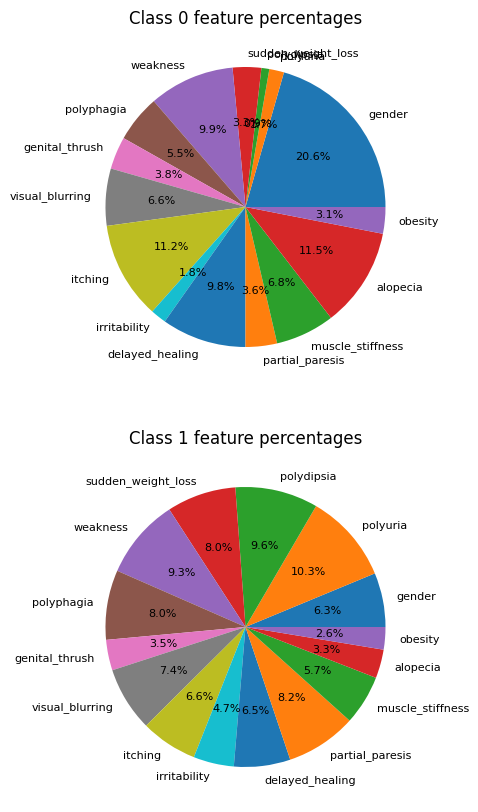

In [ ]:
# Group the data by class and sum the counts of each feature
grouped_counts = df.groupby('class')['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
                       'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'].sum()

# Calculate the total counts for each class
class_counts = grouped_counts.sum(axis=1)

# Calculate the percentage of each feature within each class
percentages = grouped_counts.div(class_counts, axis=0)

# Create pie charts for each class and feature
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

for i, class_label in enumerate([0, 1]):
    # Pie chart for class i
    axs[i].pie(percentages.loc[class_label], labels=percentages.columns, autopct='%1.1f%%', textprops={'fontsize': 8})
    axs[i].set_title(f'Class {class_label} feature percentages')

plt.show()


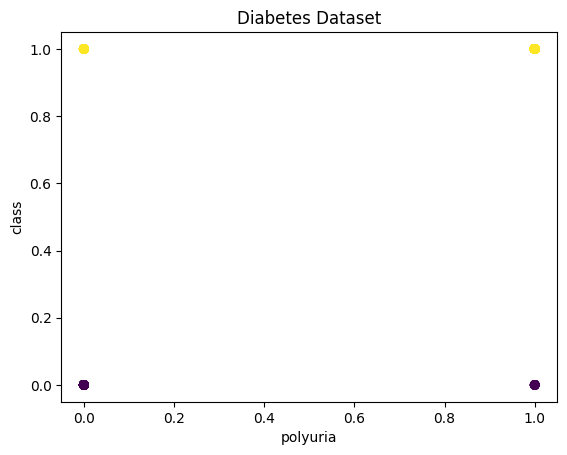

In [ ]:
# Create a scatter plot of the dataset
plt.scatter(df['polyuria'], df['class'], c=y)
plt.xlabel('polyuria')
plt.ylabel('class')
plt.title('Diabetes Dataset')
plt.show()

# **Splitting Dataset**

In [ ]:
#Performing the train test split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(416, 16)
(104, 16)
(416,)
(104,)


# **Decision Tree Classifier**

In [ ]:
#Decision Tree Classifier

dtc = DecisionTreeClassifier(random_state=42)
acc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Define the parameter grid to search
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11], 'min_samples_split': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params_dtc = grid_search.best_params_
dtc_best = grid_search.best_estimator_

dtc_best.fit(X_train, y_train)
y_pred_dtc = dtc_best.predict(X_test)
y_train_pred = dtc_best.predict(X_train)

print(f'Best hyperparameters: {best_params_dtc}')

Best hyperparameters: {'max_depth': 8, 'min_samples_split': 2}


In [ ]:
# Calculate the mean squared error (MSE) for the training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred_dtc)

# Calculate the bias and variance using the MSEs
bias = np.mean((y_test - np.mean(y_pred_dtc)) ** 2)
variance = np.mean((y_pred_dtc - np.mean(y_pred_dtc)) ** 2)

print("Bias: {:.2f}".format(bias))
print("Variance: {:.2f}".format(variance))

Bias: 0.22
Variance: 0.23


In [ ]:
#Evaluation metrics for decision tree classifier for the optimal parameters

#Training a model for the optimal parameters
dtc_clf = DecisionTreeClassifier(max_depth=8, min_samples_split = 2)
dtc_clf.fit(X_train,y_train)
y_pred_dtc = dtc_clf.predict(X_test)

#Accuracy score
acc_dtc = accuracy_score(y_test,y_pred_dtc)
print("Accuracy score for the decision tree classifier is ", acc_dtc*100)

#F1 score
f1_dtc = f1_score(y_test,y_pred_dtc)
print("F1 score for the decision tree classifier is ", f1_dtc*100)

#Precision score
prec_dtc = precision_score(y_test,y_pred_dtc)
print("Precision score for the decision tree classifier is ", prec_dtc*100)

#Recall score
rec_dtc = recall_score(y_test,y_pred_dtc)
print("Recall score for the decision tree classifier is ", rec_dtc*100)

Accuracy score for the decision tree classifier is  93.26923076923077
F1 score for the decision tree classifier is  94.8905109489051
Precision score for the decision tree classifier is  98.48484848484848
Recall score for the decision tree classifier is  91.54929577464789


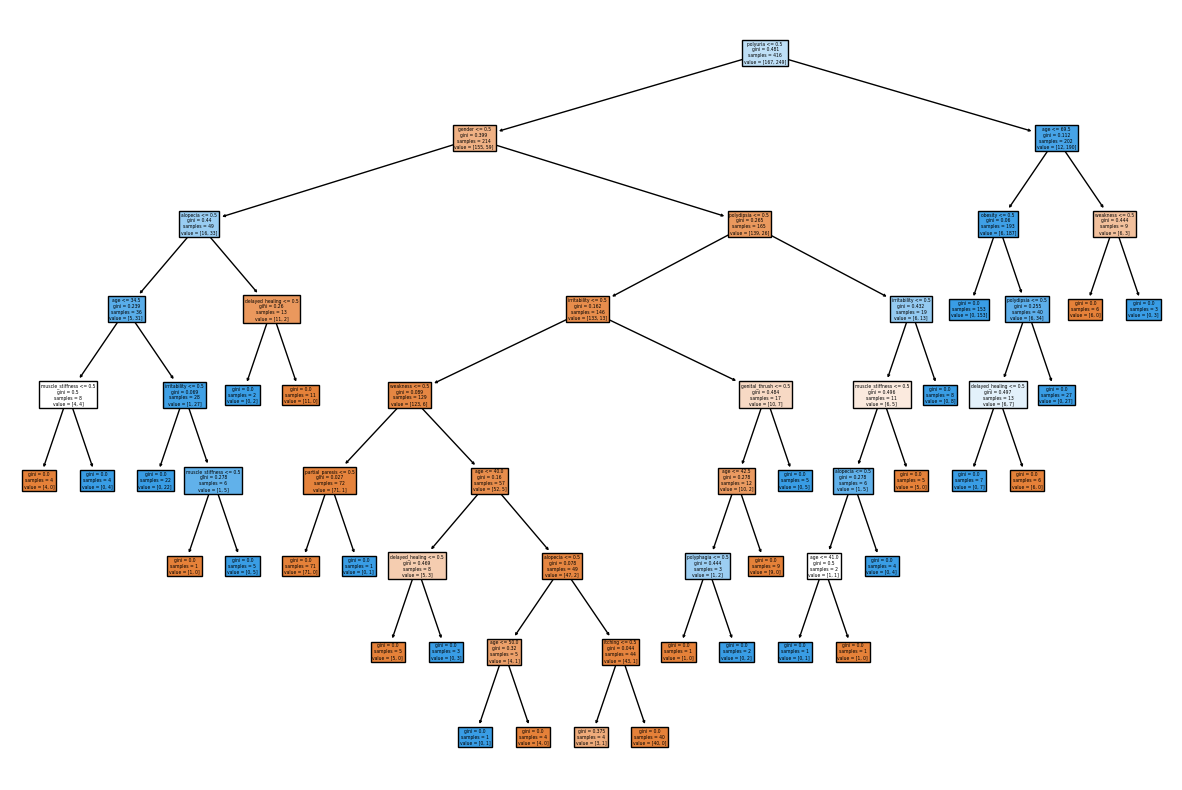

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(dtc_best, filled=True, feature_names=df.columns)
plt.show()

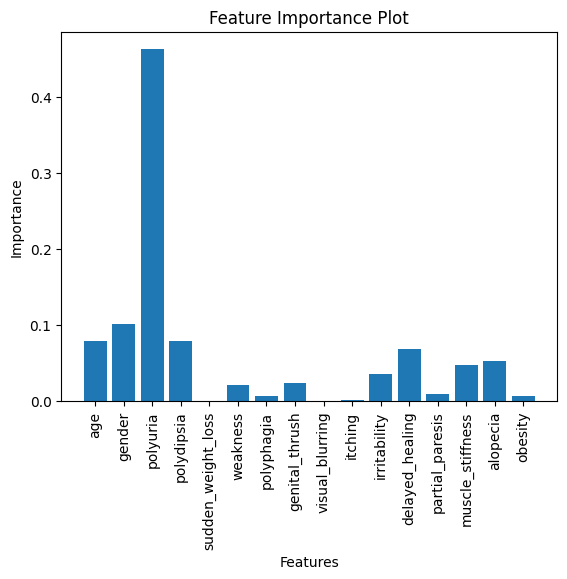

In [ ]:
#Feature importance plot

feature_importance = dtc_best.feature_importances_
plt.bar(X.columns, feature_importance)

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

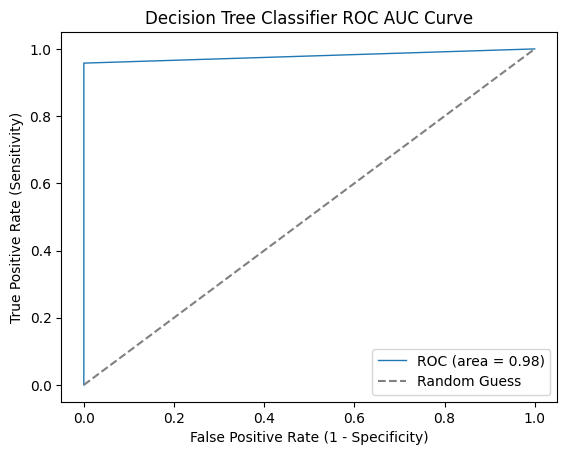

In [ ]:
#ROC AUC curve

probas = dtc_best.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Decision Tree Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

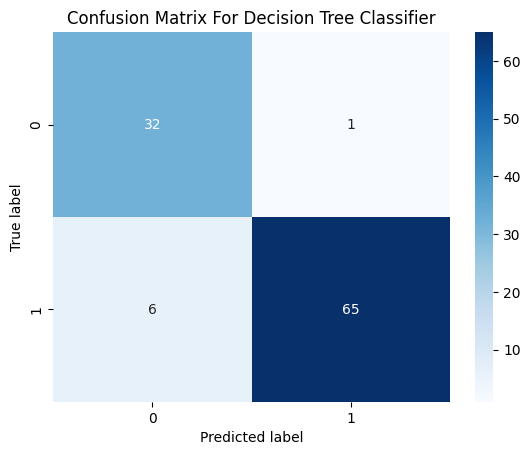

In [ ]:
#Plotting confusion matrix

cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix For Decision Tree Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **K Nearest Neighbor Classifier**

In [ ]:
#K Nearest Neighbor model

knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3, 4, 5]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters for KNN: ", grid_search.best_params_)


Best parameters for KNN:  {'algorithm': 'brute', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [ ]:
#Training a model with optmial parameters

best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train, y_train)

y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#Evaluation metrics for KNN classifier for the optimal parameters

#Accuracy score
acc_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy score for the K Nearest Neighbor Classifier is ", acc_knn*100)

#F1 score
f1_knn = f1_score(y_test,y_pred_knn)
print("F1 score for the K Nearest Neighbor Classifier is ", f1_knn*100)

#Precision score
prec_knn = precision_score(y_test,y_pred_knn)
print("Precision score for the K Nearest Neighbor Classifier is ", prec_knn*100)

#Recall score
rec_knn = recall_score(y_test,y_pred_knn)
print("Recall score for the K Nearest Neighbor Classifier is ", rec_knn*100)

Accuracy score for the K Nearest Neighbor Classifier is  92.3076923076923
F1 score for the K Nearest Neighbor Classifier is  94.02985074626865
Precision score for the K Nearest Neighbor Classifier is  100.0
Recall score for the K Nearest Neighbor Classifier is  88.73239436619718


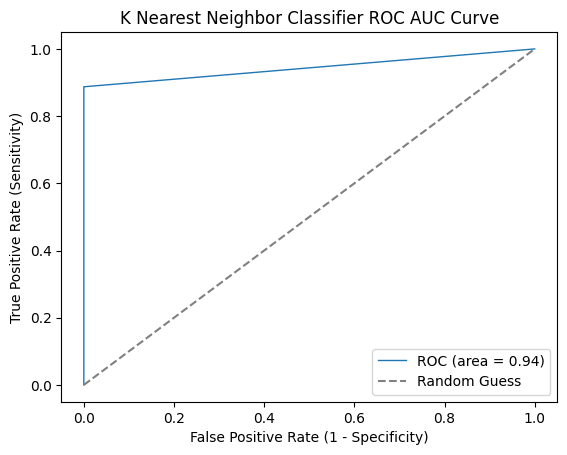

In [ ]:
#ROC AUC curve

prob = best_knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('K Nearest Neighbor Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

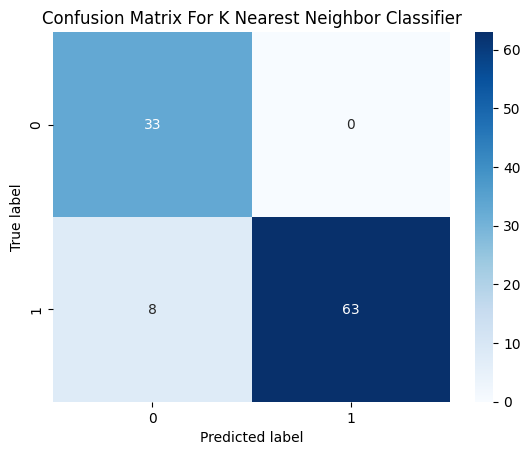

In [ ]:
#Plotting confusion matrix

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix For K Nearest Neighbor Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Random Forest Classifier**

In [ ]:
#Random Forest Classifier model

rfc = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11], 'min_samples_split': [2, 5, 7, 10, 12, 15, 20]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Training a model with optmial parameters
best_params_rfc = grid_search.best_params_
rfc_best = grid_search.best_estimator_

rfc_best.fit(X_train, y_train)
y_pred_rfc = rfc_best.predict(X_test)
y_train_rfc = rfc_best.predict(X_train)

print("Best parameters for Random Forest Classifier: ", grid_search.best_params_)

Best parameters for Random Forest Classifier:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Calculate the mean squared error (MSE) for the training and testing sets
mse_train = mean_squared_error(y_train, y_train_rfc)
mse_test = mean_squared_error(y_test, y_pred_rfc)

# Calculate the bias and variance using the MSEs
bias = np.mean((y_test - np.mean(y_pred_rfc)) ** 2)
variance = np.mean((y_pred_rfc - np.mean(y_pred_rfc)) ** 2)

print("Bias: {:.2f}".format(bias))
print("Variance: {:.2f}".format(variance))

Bias: 0.22
Variance: 0.22


In [ ]:
#Evaluation metrics for random forest classifier for the optimal parameters

#Accuracy score
acc_rfc = accuracy_score(y_test,y_pred_rfc)
print("Accuracy score for the Random Forest Classifier is ", acc_rfc*100)

#F1 score
f1_rfc = f1_score(y_test,y_pred_rfc)
print("F1 score for the Random Forest Classifier is ", f1_rfc*100)

#Precision score
prec_rfc = precision_score(y_test,y_pred_rfc)
print("Precision score for the Random Forest Classifier is ", prec_rfc*100)

#Recall score
rec_rfc = recall_score(y_test,y_pred_rfc)
print("Recall score for the Random Forest Classifier is ", rec_rfc*100)

Accuracy score for the Random Forest Classifier is  100.0
F1 score for the Random Forest Classifier is  100.0
Precision score for the Random Forest Classifier is  100.0
Recall score for the Random Forest Classifier is  100.0


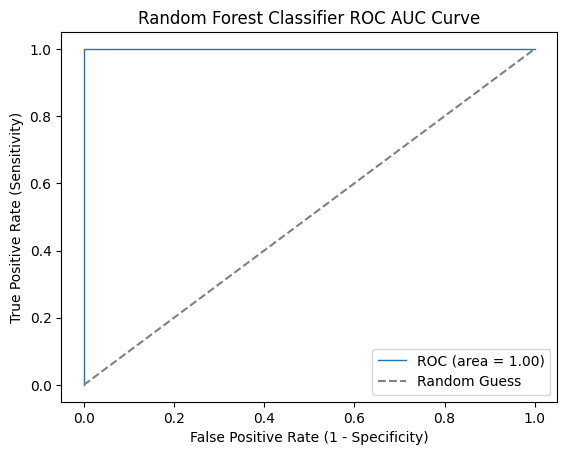

In [ ]:
#ROC AUC curve

prob = rfc_best.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Random Forest Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

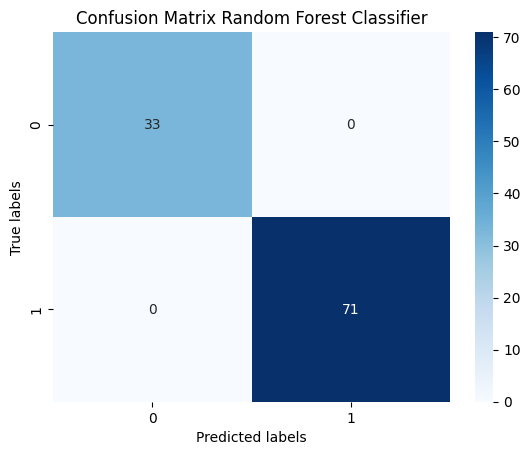

In [ ]:
#Plotting the confusion matrix

cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, cmap="Blues")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix Random Forest Classifier")
plt.show()

# **Support Vector Machines (SVM)**

In [ ]:
#Support Vector Machine model

svm = SVC()

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')


Best hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#Training a model with optimal parameters

svm = SVC(**grid_search.best_params_)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

#Evaluation metrics for SVM classifier for the optimal parameters

#Accuracy score
acc_svm = accuracy_score(y_test,y_pred_svm)
print("Accuracy score for the Support Vector Machines is ", acc_svm*100)

#F1 score
f1_svm = f1_score(y_test,y_pred_svm)
print("F1 score for the Support Vector Machines is ", f1_svm*100)

#Precision score
prec_svm = precision_score(y_test,y_pred_svm)
print("Precision score for the Support Vector Machines is ", prec_svm*100)

#Recall score
rec_svm = recall_score(y_test,y_pred_svm)
print("Recall score for the Support Vector Machines is ", rec_svm*100)

Accuracy score for the Support Vector Machines is  97.11538461538461
F1 score for the Support Vector Machines is  97.84172661870502
Precision score for the Support Vector Machines is  100.0
Recall score for the Support Vector Machines is  95.77464788732394


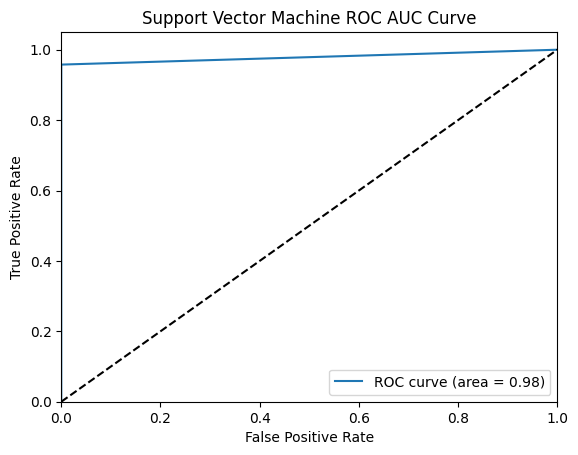

In [ ]:
#ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

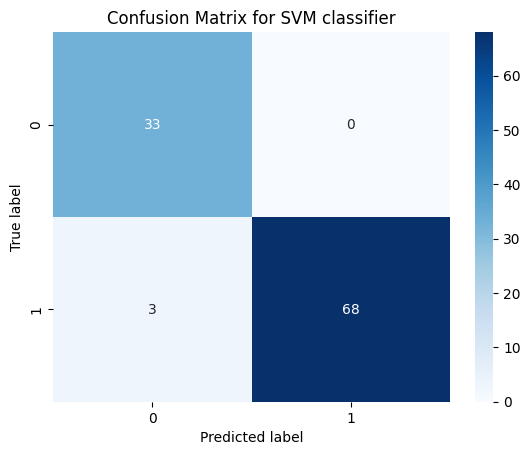

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVM classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Multilayer Perceptron**

In [ ]:
#Multilayer Perceptron model

mlp = MLPClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)], 'activation': ['relu', 'tanh'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')




Best hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
#Training a model with optimal parameters

best_params_mlp = grid_search.best_params_
mlp_best = grid_search.best_estimator_

mlp_best.fit(X_train, y_train)
y_pred_mlp = mlp_best.predict(X_test)

#Evaluation metrics for multilayer perceptron classifier for the optimal parameters

#Accuracy score
acc_mlp = accuracy_score(y_test,y_pred_mlp)
print("Accuracy score for the Multilayer Perceptron is ", acc_mlp*100)

#F1 score
f1_mlp = f1_score(y_test,y_pred_mlp)
print("F1 score for the Multilayer Perceptron is ", f1_mlp*100)

#Precision score
prec_mlp = precision_score(y_test,y_pred_mlp)
print("Precision score for the Multilayer Perceptron is ", prec_mlp*100)

#Recall score
rec_mlp = recall_score(y_test,y_pred_mlp)
print("Recall score for the Multilayer Perceptron is ", rec_mlp*100)

Accuracy score for the Multilayer Perceptron is  92.3076923076923
F1 score for the Multilayer Perceptron is  94.44444444444444
Precision score for the Multilayer Perceptron is  93.15068493150685
Recall score for the Multilayer Perceptron is  95.77464788732394


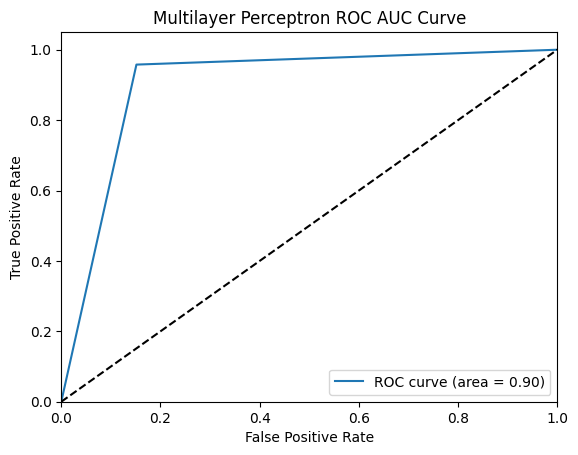

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_mlp)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multilayer Perceptron ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

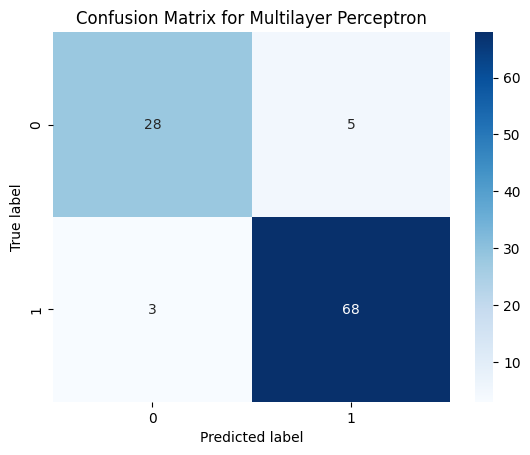

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix for Multilayer Perceptron')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Logistic Regression**

In [ ]:
#Logistic Regression model

logreg = LogisticRegression(random_state=42)

# Define hyperparameters for grid search
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga', 'lbfgs'], 'max_iter': [100, 500, 1000]}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#Training a model with optimal parameters

best_params_lr = grid_search.best_params_
lr_best = grid_search.best_estimator_

lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_test)

#Evaluation metrics for logistic regression classifier for the optimal parameters

#Accuracy score
acc_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy score for the Logistic Regression is ", acc_lr*100)

#F1 score
f1_lr = f1_score(y_test,y_pred_lr)
print("F1 score for the Logistic Regression is ", f1_lr*100)

#Precision score
prec_lr = precision_score(y_test,y_pred_lr)
print("Precision score for the Logistic Regression is ", prec_lr*100)

#Recall score
rec_lr = recall_score(y_test,y_pred_lr)
print("Recall score for the Logistic Regression is ", rec_lr*100)

Accuracy score for the Logistic Regression is  92.3076923076923
F1 score for the Logistic Regression is  94.44444444444444
Precision score for the Logistic Regression is  93.15068493150685
Recall score for the Logistic Regression is  95.77464788732394


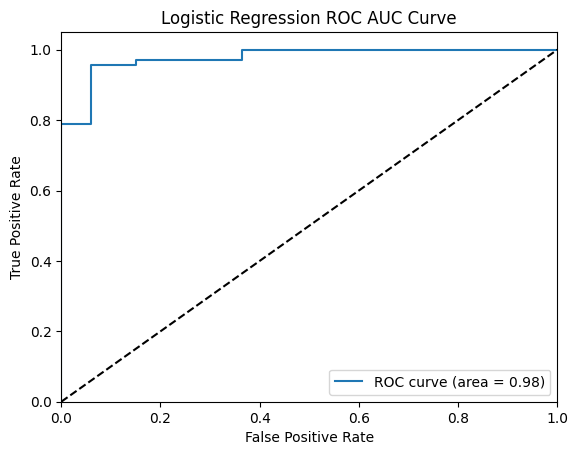

In [ ]:
#ROC AUC curve
y_score_lr = lr_best.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

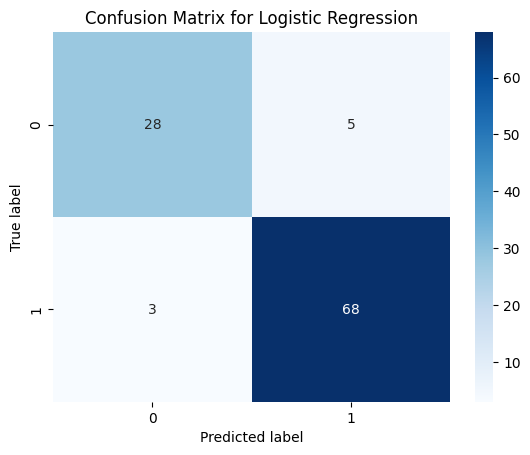

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **Feature Selection**

In [ ]:
# Initializing random forest classifier and sequential forward selector object
rfc_sfs = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
sfs = SequentialFeatureSelector(rfc_sfs, n_features_to_select=12, direction='forward', scoring='accuracy', cv=5)

sfs = sfs.fit(X_train, y_train)
selected = sfs.get_support()
print(selected)

#printing best 12 features
selected_features = X_train.columns[selected]
print("The 12 best features selected by SFS:", selected_features)

[ True  True  True  True  True  True False  True  True  True  True False
 False  True  True False]
The 12 best features selected by SFS: Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'muscle_stiffness', 'alopecia'],
      dtype='object')


In [ ]:
#Modifying training and test set according to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]



In [ ]:
#Training a decision tree classifier for the best features

dtc_sfs = DecisionTreeClassifier(max_depth=8,min_samples_split=2)

dtc_sfs.fit(X_train_selected,y_train)

y_pred_dtc_sfs = dtc_sfs.predict(X_test_selected)

#Accuracy score
acc_dtc_sfs = accuracy_score(y_test,y_pred_dtc_sfs)
print("Accuracy score for the decision tree classifier after applying feature selection is ", acc_dtc_sfs*100)

#F1 score
f1_dtc_sfs = f1_score(y_test,y_pred_dtc_sfs)
print("F1 score for the decision tree classifier after applying feature selection is ", f1_dtc_sfs*100)

#Precision score
prec_dtc_sfs = precision_score(y_test,y_pred_dtc_sfs)
print("Precision score for the decision tree classifier after applying feature selection is ", prec_dtc_sfs*100)

#Recall score
rec_dtc_sfs = recall_score(y_test,y_pred_dtc_sfs)
print("Recall score for the decision tree classifier after applying feature selection is ", rec_dtc_sfs*100)

Accuracy score for the decision tree classifier after applying feature selection is  97.11538461538461
F1 score for the decision tree classifier after applying feature selection is  97.84172661870502
Precision score for the decision tree classifier after applying feature selection is  100.0
Recall score for the decision tree classifier after applying feature selection is  95.77464788732394


In [ ]:
#Training a random forest classifier for the best features

rf_sfs = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

rf_sfs.fit(X_train_selected,y_train)

y_pred_rf_sfs = rf_sfs.predict(X_test_selected)

#Accuracy score
acc_rf_sfs = accuracy_score(y_test,y_pred_rf_sfs)
print("Accuracy score for the Random Forest classifier after applying feature selection is ", acc_rf_sfs*100)

#F1 score
f1_rf_sfs = f1_score(y_test,y_pred_rf_sfs)
print("F1 score for the Random Forest classifier after applying feature selection is ", f1_rf_sfs*100)

#Precision score
prec_rf_sfs = precision_score(y_test,y_pred_rf_sfs)
print("Precision score for the Random Forest classifier after applying feature selection is ", prec_rf_sfs*100)

#Recall score
rec_rf_sfs = recall_score(y_test,y_pred_rf_sfs)
print("Recall score for the Random Forest classifier after applying feature selection is ", rec_rf_sfs*100)

Accuracy score for the Random Forest classifier after applying feature selection is  99.03846153846155
F1 score for the Random Forest classifier after applying feature selection is  99.29078014184397
Precision score for the Random Forest classifier after applying feature selection is  100.0
Recall score for the Random Forest classifier after applying feature selection is  98.59154929577466
